# Detecting Kermit the Frog (Audio)

## Convert and extract raw data

In [1]:
import subprocess
import librosa

def load(path, target):
    command = "ffmpeg -i" + path + "-ab 160k -ac 2 -ar 44100 -vn" + target
    subprocess.call(command, shell=True) 
    return librosa.load(target)
    
raw, sample_rate = load("../data/Muppets-02-01-01.avi", "../data/ep1_audio.wav")

In [2]:
# get second or timeframe from raw waveform
def sec(sec, raw_wave=raw, sr=22050):
    if type(sec) == int:
        return raw_wave[sec*sr:(sec+1)*sr]
    elif type(sec) == list and len(sec) == 1:
        return raw_wave[sec[0]*sr:(sec[0]+1)*sr]
    elif type(sec) == list and len(sec) == 2:
        return raw_wave[sec[0]*sr:(sec[1]+1)*sr]

## Wave Plot

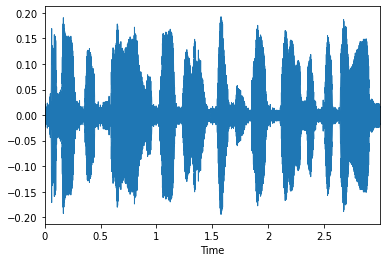

In [3]:
import librosa.display

# First appearance of kermit of the muppet show
librosa.display.waveplot(sec([40,42]), sr=sample_rate);

## Mel Frequency Spectogram

In [4]:
mfcc = librosa.feature.mfcc(sec([40]))
mfcc.shape

(20, 44)

In [5]:
delta_mfcc = librosa.feature.delta(mfcc)
delta_mfcc.shape

(20, 44)

In [6]:
delta2_mfcc = librosa.feature.delta(delta_mfcc, order=2)
delta2_mfcc.shape

(20, 44)

## Create (STUPID) Feature Vectors

In [7]:
def max_mfcc(wave_form, sr=22050):
    features = []
    for i in range(round(len(wave_form)/sr)):
        mfcc = librosa.feature.mfcc(sec(i, wave_form))
        # pick maximal value for each DCT dimension
        features.append([max(dim) for dim in mfcc])
    return features

In [8]:
features = max_mfcc(raw)

## Load ground truth

In [9]:
import pandas as pd
truth_csv = pd.read_csv('../data/gt/gt_02_01_01.csv')
truth = truth_csv.kermit_audio[:len(features)]

## Fit Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(max_depth=2, random_state=0)
clf.fit(features, truth)

RandomForestClassifier(max_depth=2, random_state=0)

In [11]:
from sklearn.metrics import precision_score as precision

# training accuracy
precision(truth, clf.predict(features))

1.0

## Extract Test Features

In [ ]:
# extract features
test_raw, test_sr = load('../data/Muppets-02-04-04.avi', '../data/ep2_audio.wav')
test_features = max_mfcc(test_raw)

## Load Test Ground Truth

In [ ]:
# load ground truth
test_truth_csv = pd.read_csv('../data/gt/gt_02_04_04.csv.csv')
test_truth = truth_csv.kermit_audio[:len(test_features)]

In [ ]:
# training accuracy
precision(test_truth, clf.predict(test_features))